In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import src.config as config

In [3]:
import hopsworks

project = hopsworks.login(
    project=config.HOPSWORKS_PROJECT_NAME, api_key_value=config.HOPSWORKS_API_KEY
)

feature_store = project.get_feature_store()
feature_group = feature_store.get_feature_group(
    name=config.FEATURE_GROUP_NAME,
    version=config.FEATURE_GROUP_VERSION
)

2025-03-03 14:44:53,968 INFO: Initializing external client
2025-03-03 14:44:53,969 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-03 14:44:54,812 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1215646


In [4]:
# Create a feature view if it doesn't already exist
try:
    feature_store.create_feature_view(
        name=config.FEATURE_VIEW_NAME,
        version=config.FEATURE_VIEW_VERSION,
        query=feature_group.select_all(),
    )
    print(f"Feature view '{config.FEATURE_VIEW_NAME}' (version {config.FEATURE_VIEW_VERSION}) created successfully.")
except Exception as e:
    print(f"Error creating feature view: {e}")

# Retrieve the feature view
try:
    feature_view = feature_store.get_feature_view(
        name=config.FEATURE_VIEW_NAME,
        version=config.FEATURE_VIEW_VERSION,
    )
    print(f"Feature view '{config.FEATURE_VIEW_NAME}' (version {config.FEATURE_VIEW_VERSION}) retrieved successfully.")
except Exception as e:
    print(f"Error retrieving feature view: {e}")

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1215646/fs/1202297/fv/taxi_nyc_view/version/1
Feature view 'taxi_nyc_view' (version 1) created successfully.
Feature view 'taxi_nyc_view' (version 1) retrieved successfully.


In [62]:
import hopsworks
import src.config as config
import pandas as pd

# Connect to Hopsworks project
project = hopsworks.login(
    project=config.HOPSWORKS_PROJECT_NAME,
    api_key_value=config.HOPSWORKS_API_KEY
)

# Connect to the feature store
feature_store = project.get_feature_store()

# Retrieve the feature group (make sure your config settings match your Hopsworks UI)
feature_group = feature_store.get_feature_group(
    name=config.FEATURE_GROUP_NAME,      # For example, "aml_nyc_taxi"
    version=config.FEATURE_GROUP_VERSION   # For example, 1
)

# OPTIONAL: Print the feature group schema to verify
print("Feature group schema:")
for feat in feature_group.features:
    print(f" - {feat.name} (type: {feat.type})")

# Check the original DataFrame columns
print("Original DataFrame columns:", ts_data.columns.tolist())

# Create a new DataFrame with exactly the expected columns:
# We assume that 'target' in ts_data represents the ride count.
ts_data_aligned = ts_data[["pickup_hour", "pickup_location_id", "target"]].rename(columns={"target": "rides"})

# Confirm that the aligned DataFrame now has the expected columns
print("Aligned DataFrame columns:", ts_data_aligned.columns.tolist())

# Insert the aligned DataFrame into Hopsworks using Spark execution as a fallback
feature_group.insert(ts_data_aligned, write_options={"wait_for_job": False, "use_spark": True})
print("Data inserted successfully into Hopsworks feature group!")


2025-03-03 15:20:11,679 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-03-03 15:20:11,682 INFO: Initializing external client
2025-03-03 15:20:11,682 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-03 15:20:12,331 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1215646
Feature group schema:
 - pickup_hour (type: timestamp)
 - pickup_location_id (type: int)
 - rides (type: int)
Original DataFrame columns: ['rides_t-672', 'rides_t-671', 'rides_t-670', 'rides_t-669', 'rides_t-668', 'rides_t-667', 'rides_t-666', 'rides_t-665', 'rides_t-664', 'rides_t-663', 'rides_t-662', 'rides_t-661', 'rides_t-660', 'rides_t-659', 'rides_t-658', 'rides_t-657', 'rides_t-656', 'rides_t-655', 'rides_t-654', 'rides_t-653', 'rides_t-652', 'rides_t-651', 'rides_t-650', 'rides_t-649', 'rides_t-648', 'rides_t-647', 'rides_t-646', 'rides_t-645', 'rides_t-644', 'rides_t-643', 'rides_t-642', 'rides_t-641', 'rides_t-64

Uploading Dataframe: 100.00% |█| Rows 87620/87620 | Elapsed Time: 00:01 | Remain


Launching job: aml_nyc_taxi_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1215646/jobs/named/aml_nyc_taxi_2_offline_fg_materialization/executions
Data inserted successfully into Hopsworks feature group!


In [64]:
ts_data = ts_data.sort_values(["pickup_location_id", "pickup_hour"]).reset_index(drop=True)

In [67]:
ts_data.head()

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,target
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2023-01-29,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-30,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-01-31,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-01,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2023-02-02,2,0


In [69]:
ts_data["pickup_hour"].min()

Timestamp('2023-01-29 00:00:00')

In [71]:
ts_data["pickup_hour"].max()

Timestamp('2023-12-31 00:00:00')

In [73]:
ts_data_copy = ts_data.copy()

In [75]:
import pandas as pd
ts_data["pickup_hour"] = pd.to_datetime(ts_data["pickup_hour"], errors="coerce")

In [77]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Columns: 675 entries, rides_t-672 to target
dtypes: datetime64[ns](1), int16(2), int64(672)
memory usage: 450.2 MB


In [79]:
ts_data["pickup_hour"] = ts_data["pickup_hour"].dt.tz_localize(None)  # Remove timezone

In [81]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Columns: 675 entries, rides_t-672 to target
dtypes: datetime64[ns](1), int16(2), int64(672)
memory usage: 450.2 MB


In [83]:
ts_data["year_month"] = ts_data["pickup_hour"].dt.to_period("M")  # Year-Month format

In [85]:
ts_data

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,target,year_month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-29,2,0,2023-01
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-30,2,0,2023-01
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-31,2,0,2023-01
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-02-01,2,0,2023-02
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-02-02,2,0,2023-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87615,25,14,5,3,7,16,53,133,126,136,...,62,58,50,48,42,37,2023-12-27,263,12,2023-12
87616,30,7,9,6,5,23,58,123,136,108,...,79,65,71,72,75,35,2023-12-28,263,19,2023-12
87617,50,26,17,9,8,11,43,116,137,132,...,78,60,85,63,62,37,2023-12-29,263,38,2023-12
87618,117,88,39,19,14,12,27,37,70,97,...,75,100,98,88,77,69,2023-12-30,263,59,2023-12


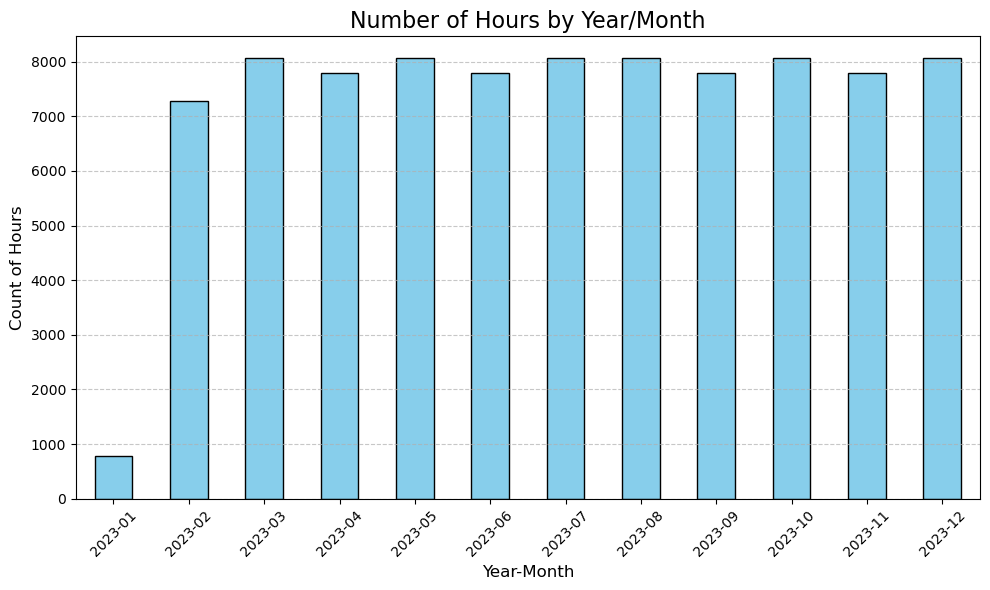

In [87]:
import matplotlib.pyplot as plt

# Group by year_month and count
hour_counts = ts_data.groupby("year_month").size()

# Plot the data
ax = hour_counts.plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="black")  # Use 'ax' to store the plot object
ax.set_title("Number of Hours by Year/Month", fontsize=16)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Count of Hours", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [89]:
ts_data.head()      

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id,target,year_month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-29,2,0,2023-01
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-30,2,0,2023-01
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-01-31,2,0,2023-01
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-02-01,2,0,2023-02
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2023-02-02,2,0,2023-02


In [91]:
gte = ts_data["year_month"] >= pd.Period("2023-01", freq="M")
lte = ts_data["year_month"] <= pd.Period("2023-12", freq="M")
cond = gte & lte
filtered_data = ts_data[cond].reset_index(drop=True)

In [93]:
filtered_data.drop(columns=["year_month"], inplace=True) 

In [95]:
filtered_data.shape

(87620, 675)

In [97]:
ts_data = filtered_data

In [99]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87620 entries, 0 to 87619
Columns: 675 entries, rides_t-672 to target
dtypes: datetime64[ns](1), int16(2), int64(672)
memory usage: 450.2 MB


In [101]:
ts_data.head()["pickup_hour"].values

array(['2023-01-29T00:00:00.000000000', '2023-01-30T00:00:00.000000000',
       '2023-01-31T00:00:00.000000000', '2023-02-01T00:00:00.000000000',
       '2023-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [107]:
features, targets = transform_ts_data_info_features_and_target(ts_data, window_size=3, step_size=1)


In [109]:
features.sort_values(["pickup_location_id", "pickup_hour"])

,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id
0,0,0,0,2023-02-01,2
1,0,0,0,2023-02-02,2
2,0,0,0,2023-02-03,2
3,0,0,0,2023-02-04,2
4,0,0,0,2023-02-05,2
...,...,...,...,...,...
86835,32,25,8,2023-12-27,263
86836,25,8,12,2023-12-28,263
86837,8,12,19,2023-12-29,263
86838,12,19,38,2023-12-30,263


In [111]:
features[features["pickup_location_id"] == 2]

,rides_t-3,rides_t-2,rides_t-1,pickup_hour,pickup_location_id
0,0,0,0,2023-02-01,2
1,0,0,0,2023-02-02,2
2,0,0,0,2023-02-03,2
3,0,0,0,2023-02-04,2
4,0,0,0,2023-02-05,2
...,...,...,...,...,...
329,0,0,0,2023-12-27,2
330,0,0,0,2023-12-28,2
331,0,0,0,2023-12-29,2
332,0,0,0,2023-12-30,2


In [113]:
features_copy = features.copy()

In [115]:
features_targets = features.copy()
features_targets["target"] = targets

features_targets.shape

(86840, 6)

In [117]:
from datetime import datetime, timedelta  
import pandas as pd  
from src.data_utils import split_time_series_data  

# Define the cutoff date as 28 days before today  
cutoff_date = pd.Timestamp(datetime.now() - timedelta(days=28))  
# # Convert the cutoff date to a string in a specific format (e.g., 'YYYY-MM-DD')  
# cutoff_date_str = cutoff_date.strftime('%Y-%m-%d')
# # Print the string representation of the cutoff date  
# print(f"Cutoff date as string: {cutoff_date_str}")
cutoff_date

Timestamp('2025-02-03 15:28:24.313566')

In [119]:
X_train, y_train, X_test, y_test = split_time_series_data(
    features_targets,
    cutoff_date=cutoff_date,
    target_column="target"
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(86840, 5)
(86840,)
(0, 5)
(0,)


In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86840 entries, 0 to 86839
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rides_t-3           86840 non-null  int64         
 1   rides_t-2           86840 non-null  int64         
 2   rides_t-1           86840 non-null  int64         
 3   pickup_hour         86840 non-null  datetime64[ns]
 4   pickup_location_id  86840 non-null  int16         
dtypes: datetime64[ns](1), int16(1), int64(3)
memory usage: 2.8 MB


In [127]:
from src.pipeline_utils import get_pipeline
pipeline = get_pipeline()

In [129]:
pipeline.fit(features, targets)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 86840, number of used features: 4
[LightGBM] [Info] Start training from score 11.249298


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function average_rides_last_4_weeks at 0x17aaee020>)),
                ('temporalfeatureengineer', TemporalFeatureEngineer()),
                ('lgbmregressor', LGBMRegressor())])

In [131]:
from sklearn.metrics import mean_absolute_error
predictions = pipeline.predict(features) 

In [133]:
predictions

array([ 0.10309696,  0.10635817,  0.12761684, ..., 24.98099115,
       58.328501  , 63.22874791])

In [135]:
test_mae = mean_absolute_error(targets, predictions)
print(f"{test_mae:.4f}")

3.2247


In [137]:
import joblib  


# Save the pipeline  
joblib.dump(pipeline, config.MODELS_DIR / "lgb_model.pkl")

['/Users/sudeepthirongali/nyc_taxi_project/models/lgb_model.pkl']

In [145]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_schema = Schema(features)
output_schema = Schema(targets)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

In [181]:
import joblib  
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
from pathlib import Path
import hopsworks
import src.config as config

# Assuming 'features', 'targets', 'test_mae', and 'project' are already defined

# Create model schema from features and targets
input_schema = Schema(features)
output_schema = Schema(targets)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

# Retrieve the model registry from Hopsworks project
model_registry = project.get_model_registry()

model = model_registry.sklearn.create_model(
    name="taxi_demand_predictor_next_hour",
    metrics={"test_mae": test_mae},
    description="LightGBM regressor",
    input_example=features.sample(),
    model_schema=model_schema
)

# Define the full path (using macOS forward slashes)
model_path = Path("/Users/sudeepthirongali/nyc_taxi_project/models/lgb_model.pkl")

# Ensure the directory exists
model_path.parent.mkdir(parents=True, exist_ok=True)

# Save the model to the local filesystem (convert Path to string)
model.save(str(model_path))
print("Model saved successfully at:", model_path)


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/276500 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/37 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/550 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1215646/models/taxi_demand_predictor_next_hour/1
Model saved successfully at: /Users/sudeepthirongali/nyc_taxi_project/models/lgb_model.pkl


In [183]:
from src.inference import load_model_from_registry

model = load_model_from_registry()

2025-03-03 22:18:18,291 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-03-03 22:18:18,293 INFO: Initializing external client
2025-03-03 22:18:18,293 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-03-03 22:18:21,890 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1215646


In [185]:
from src.inference import get_model_predictions

In [193]:
from src.inference import get_model_predictions

# Obtain predictions using your inference function
preds = get_model_predictions(model, features_copy)
print("Predictions:", preds)




Predictions:        pickup_location_id  predicted_demand
0                       2               0.0
1                       2               0.0
2                       2               0.0
3                       2               0.0
4                       2               0.0
...                   ...               ...
86835                 263              14.0
86836                 263              18.0
86837                 263              25.0
86838                 263              58.0
86839                 263              63.0

[86840 rows x 2 columns]


In [197]:
preds

,pickup_location_id,predicted_demand
0,2,0.0
1,2,0.0
2,2,0.0
3,2,0.0
4,2,0.0
...,...,...
86835,263,14.0
86836,263,18.0
86837,263,25.0
86838,263,58.0


In [199]:
test_mae = mean_absolute_error(targets, preds["predicted_demand"])
print(f"{test_mae:.4f}")

3.1524
